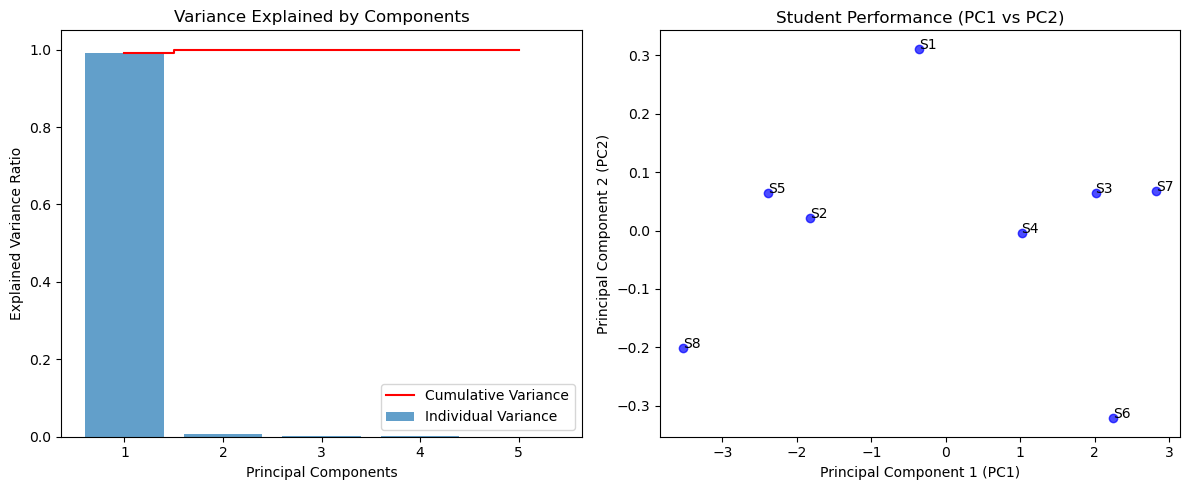

Explained Variance Ratio per Component:
PC1: 0.9922
PC2: 0.0064
PC3: 0.0008
PC4: 0.0006
PC5: 0.0001


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
# Ensure 'student_performance.csv' is in your working directory
df = pd.read_csv('/home/nmit/Pictures/student_performance.csv')

# 2. Standardize the features
# PCA is sensitive to the scale of features, so we standardize to 
# mean=0 and variance=1.
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 3. Apply PCA
# We initialize PCA without specifying the number of components to see all of them.
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# 4. Calculate Explained Variance
# This helps identify which components capture the most information.
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 5. Create a DataFrame for the transformed data
pca_columns = [f'PC{i+1}' for i in range(pca_result.shape[1])]
pca_df = pd.DataFrame(pca_result, columns=pca_columns)

# 6. Save the transformed data to a CSV file
pca_df.to_csv('pca_transformed_data.csv', index=False)

# 7. Visualization
plt.figure(figsize=(12, 5))

# Plot 1: Explained Variance (Scree Plot)
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, 
        alpha=0.7, label='Individual Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, 
         where='mid', label='Cumulative Variance', color='red')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Variance Explained by Components')
plt.legend()

# Plot 2: Scatter plot of the first two components
# This visualizes student performance in a 2D space.
plt.subplot(1, 2, 2)
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='blue', alpha=0.7)
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Student Performance (PC1 vs PC2)')

# Annotate student points (S1, S2, etc.)
for i in range(len(pca_df)):
    plt.annotate(f'S{i+1}', (pca_df['PC1'][i], pca_df['PC2'][i]))

plt.tight_layout()
plt.savefig('pca_analysis.png')
plt.show()

# Print the variance breakdown
print("Explained Variance Ratio per Component:")
for i, ev in enumerate(explained_variance):
    print(f"PC{i+1}: {ev:.4f}")

In [ ]:
#pca_transformed_data.csv

In [ ]:
#Here are the first few rows of the transformed dataset:

In [ ]:
PC1       PC2       PC3       PC4       PC5
0  0.356046 -0.311099 -0.087996 -0.017603 -0.015769
1  1.826263 -0.021838  0.071555  0.113287 -0.008536
2 -2.009091 -0.063630  0.006055  0.001489  0.036604
3 -1.016593  0.004911  0.113151 -0.089576 -0.013308
4  2.389738 -0.063877 -0.006674 -0.044363  0.007474